### Import Libaries

In [1]:
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


### Set diagnostic code

In [2]:
device="cuda"
if device == "cuda" and torch.cuda.is_available():
    print("Running on GPU")
else:
    device = "cpu"
    print("Running on CPU")

Running on GPU


### Load data

In [3]:
# Set Transform
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
train_dataset = datasets.MNIST(root="./data",train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root="./data",train=False,download=True,transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15976549.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 485813.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4457982.66it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3902197.62it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
image , label =train_dataset[0]
image.shape # [ C H W ]

torch.Size([1, 28, 28])

In [6]:
# How many samples are there?
len(train_dataset.data), len(train_dataset.targets), len(test_dataset.data), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

In [7]:
# See classes
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### Visualize a Image

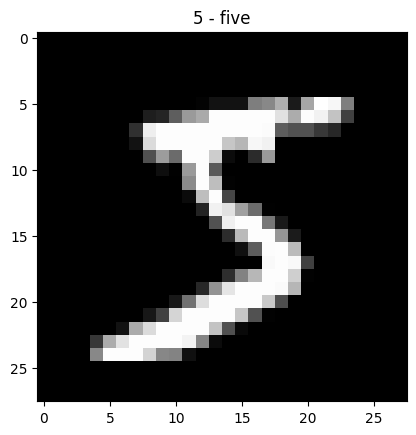

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

### Visualize more Images Randomly
orch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

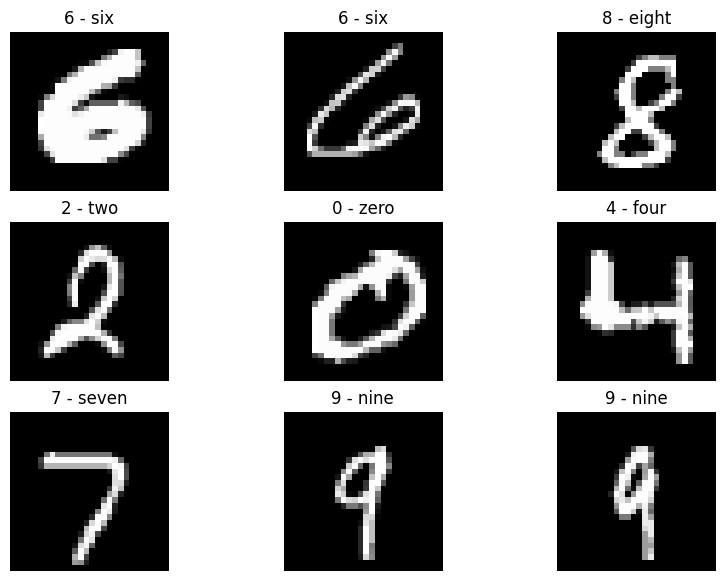

In [10]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(10,7))
rows , colns = 3,3
for i in range (1,rows*colns+1):
  random_indx=torch.randint(0,len(train_dataset),size=[1]).item()
  img,label=train_dataset[random_indx]
  fig.add_subplot(rows,colns,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)





### Prepare a DataLoder

In [11]:
BATCH_SIZE=32
train_dataloader= DataLoader(train_dataset,batch_size=BATCH_SIZE,num_workers=os.cpu_count(),shuffle=True)
test_dataloader= DataLoader(test_dataset,batch_size=BATCH_SIZE,num_workers=os.cpu_count(),shuffle=False)

In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


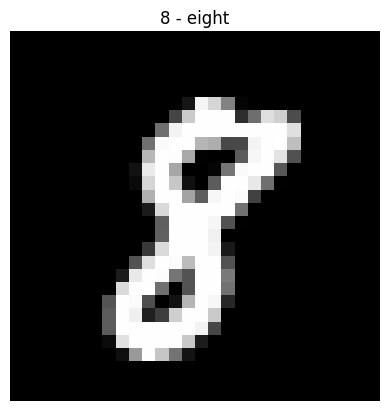

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Build a Linear Auto-Encoder Model

In [14]:
class AutoEncoder_Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        # Image Shape [ N, 28*28 ]
        nn.Linear(in_features=28*28,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=12),
        nn.ReLU(),
        nn.Linear(in_features=12,out_features=3)
    )

    self.decoder=nn.Sequential(
        nn.Linear(in_features=3,out_features=12),
        nn.ReLU(),
        nn.Linear(in_features=12,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=28*28),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoder=self.encoder(x)
    decoder=self.decoder(encoder)
    return decoder

model_1=AutoEncoder_Linear().to(device)
model_1

AutoEncoder_Linear(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

### Build a CNN AutoEncoder Model

In [15]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        # Image shape[ N , 1 , 28, 28 ]
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=2,padding=1), # N , 16 , 14 ,14
        nn.ReLU(),
        nn.Conv2d(16, 32, 3,stride=2,padding=1), # N , 32 , 7, 7
        nn.ReLU(),
        nn.Conv2d(32,64,7) # N , 64 , 1 , 1
    )

    self.decoder=nn.Sequential(
        nn.ConvTranspose2d(in_channels=64,out_channels=32,kernel_size=7), # N , 32 , 7 ,7
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3,stride=2,padding=1,output_padding=1),# N , 16 , 14 ,14
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,3,stride=2,padding=1,output_padding=1),# N , 1 , 28 , 28
        nn.Sigmoid()
    )

  def forward(self,x):
    encoder=self.encoder(x)
    decoder=self.decoder(encoder)
    return decoder

model_2=AutoEncoder().to(device)
model_2

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

### Loss and Optimizer

In [16]:
loss=nn.MSELoss()
optimizer1=optim.Adam(params=model_1.parameters(),lr=0.01,weight_decay=0.005)

optimizer2=optim.Adam(params=model_2.parameters(),lr=0.01,weight_decay= 1e-5)

### Training For Model_1

In [17]:
num_epochs=5
outputs_1=[]

for epoch in range(num_epochs):
  for (img, _ ) in train_dataloader:
    img=img.to(device)

    # Train
    model_1.train()

    train_loss=0
    img = img.reshape(-1,28*28)
    # Forward Pass
    out =model_1(img)
    loss_value=loss(out,img)
    train_loss += loss_value.item()

    optimizer1.zero_grad()

    loss_value.backward()

    optimizer1.step()

  print(f"Epoch:{epoch+1},Train Loss:{loss_value.item():.4f} ")
  outputs_1.append([epoch , img , out])

Epoch:1,Train Loss:0.0729 
Epoch:2,Train Loss:0.0769 
Epoch:3,Train Loss:0.0688 
Epoch:4,Train Loss:0.0729 
Epoch:5,Train Loss:0.0730 


### Visualize Model_1

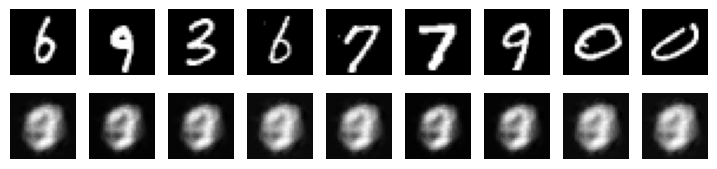

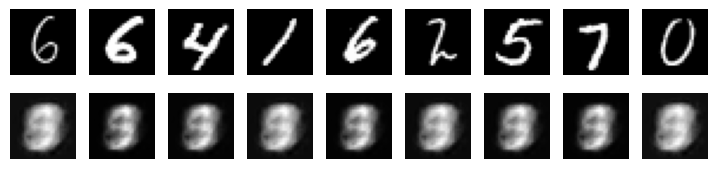

In [18]:
import matplotlib.pyplot as plt

# Plotting images
for k in range(0, num_epochs, 4):
    if k >= len(outputs_1):
        break

    plt.figure(figsize=(9, 2))
    plt.gray()
    original = outputs_1[k][1].detach().cpu().numpy()
    reconstructed = outputs_1[k][2].detach().cpu().numpy()

    for i, item in enumerate(original):
        if i >= 9:
            break
        plt.subplot(2, 9, i + 1)
        item = item.reshape(28, 28)
        plt.imshow(item, cmap='gray')
        plt.axis(False)

    for i, item in enumerate(reconstructed):
        if i >= 9:
            break
        plt.subplot(2, 9, i + 10)
        item = item.reshape(28, 28)
        plt.imshow(item, cmap='gray')
        plt.axis(False)

    plt.show()


### Train Model_2

In [19]:
num_epochs=5
outputs_2=[]

for epoch in range(num_epochs):
  for (img, _ ) in train_dataloader:
    img=img.to(device)

    # Train
    model_2.train()

    train_loss=0
    # Forward Pass
    out = model_2(img)
    loss_value=loss(out,img)
    train_loss += loss_value.item()

    optimizer2.zero_grad()

    loss_value.backward()

    optimizer2.step()

  print(f"Epoch:{epoch+1},Train Loss:{loss_value.item():.4f} ")
  outputs_2.append([epoch , img , out])

Epoch:1,Train Loss:0.0061 
Epoch:2,Train Loss:0.0062 
Epoch:3,Train Loss:0.0052 
Epoch:4,Train Loss:0.0050 
Epoch:5,Train Loss:0.0044 


### Visualize Model_2

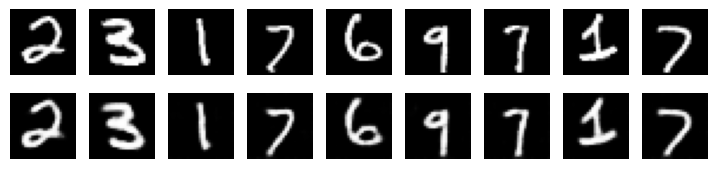

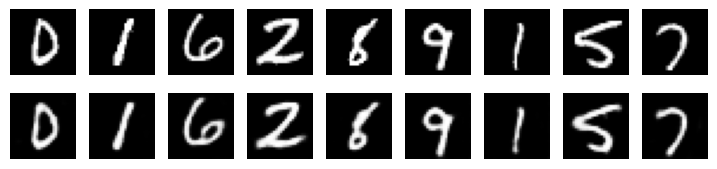

In [20]:
# Plotting images
for k in range(0, num_epochs, 4):
    if k >= len(outputs_2):
        break

    plt.figure(figsize=(9, 2))
    plt.gray()
    original = outputs_2[k][1].detach().cpu().numpy()
    reconstructed = outputs_2[k][2].detach().cpu().numpy()

    for i, item in enumerate(original[:9]):
        plt.subplot(2, 9, i + 1)
        item = item.reshape(28, 28)
        plt.imshow(item, cmap='gray')
        plt.axis('off')

    for i, item in enumerate(reconstructed[:9]):
        plt.subplot(2, 9, i + 10)
        item = item.reshape(28, 28)
        plt.imshow(item, cmap='gray')
        plt.axis('off')

    plt.show()

